In [ ]:
'''
The objective of this code is to convert a tif image to a tiled png

'''

'\nThe objective of this code is to convert a tif image to a tiled png\n\n'

In [ ]:
import rasterio
import rasterio.plot
import rasterio.features
import rasterio.warp
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pprint

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
filepath = '/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/modis/modis_2017_sep.tif'

In [ ]:
# Open the dataset using rasterio
dataset = rasterio.open(filepath)

# Find the number of bands in the image
num_bands = dataset.indexes

# We have a total of three bands (indix starts at 1)
band_red = dataset.read(1) # Band 1
band_green = dataset.read(2) # Band 4
band_blue = dataset.read(3) # Band 3


In [ ]:
# Plot the dataset
fig = plt.figure(figsize=(100,100))
rasterio.plot.show(dataset)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Create an empty variable for the three channels
channels=np.empty([3,band_red.shape[0],band_red.shape[1]],dtype=np.uint8)

In [ ]:
# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [ ]:
from skimage import  img_as_ubyte
from skimage import exposure
for index,image in enumerate([band_red,band_green,band_blue]):
    # stretched=exposure.equalize_hist(image)
    stretched=normalize(image)      
    channels[index,:,:] = img_as_ubyte(stretched)


In [ ]:
tif_filename = '/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/modis/modis_2017_sep.tiff'
num_chans, height, width = channels.shape
with rasterio.open(tif_filename,'w',driver='GTiff',
                   height=height,width=width,
                   count=num_chans,dtype=channels.dtype,
                   crs=dataset.crs,transform=dataset.transform, nodata=0.0) as dst:
        dst.write(channels)
        keys=['1','4','3']
        for index,chan_name in enumerate(keys):
            dst.update_tags(index+1,name=chan_name)



In [ ]:
with rasterio.open(tif_filename) as infile:
    print(f"\nnew profile: {pprint.pformat(infile.profile)}\n")
    profile=infile.profile
    #
    # change the driver name from GTiff to PNG
    #
    profile['driver']='PNG'
    #
    # pathlib makes it easy to add a new suffix to a
    # filename
    #    
    png_filename='/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/modis/modis_2017_sep.png'
    raster=infile.read()
    with rasterio.open(png_filename, 'w', **profile) as dst:
        dst.write(raster)
    #
    # now do jpeg
    #
    profile['driver']='JPEG'
    jpeg_filename='/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/modis/modis_2017_sep.jpgb'
    with rasterio.open(jpeg_filename, 'w', **profile) as dst:
        dst.write(raster)


new profile: {'count': 3,
 'crs': CRS.from_wkt('PROJCS["MODIS Sinusoidal",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]'),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 1826,
 'interleave': 'pixel',
 'nodata': 0.0,
 'tiled': False,
 'transform': Affine(1000.0000000010791, 0.0, -14291109.353993822,
       0.0, -999.9999999989208, 3173554.6770073744),
 'width': 13814}



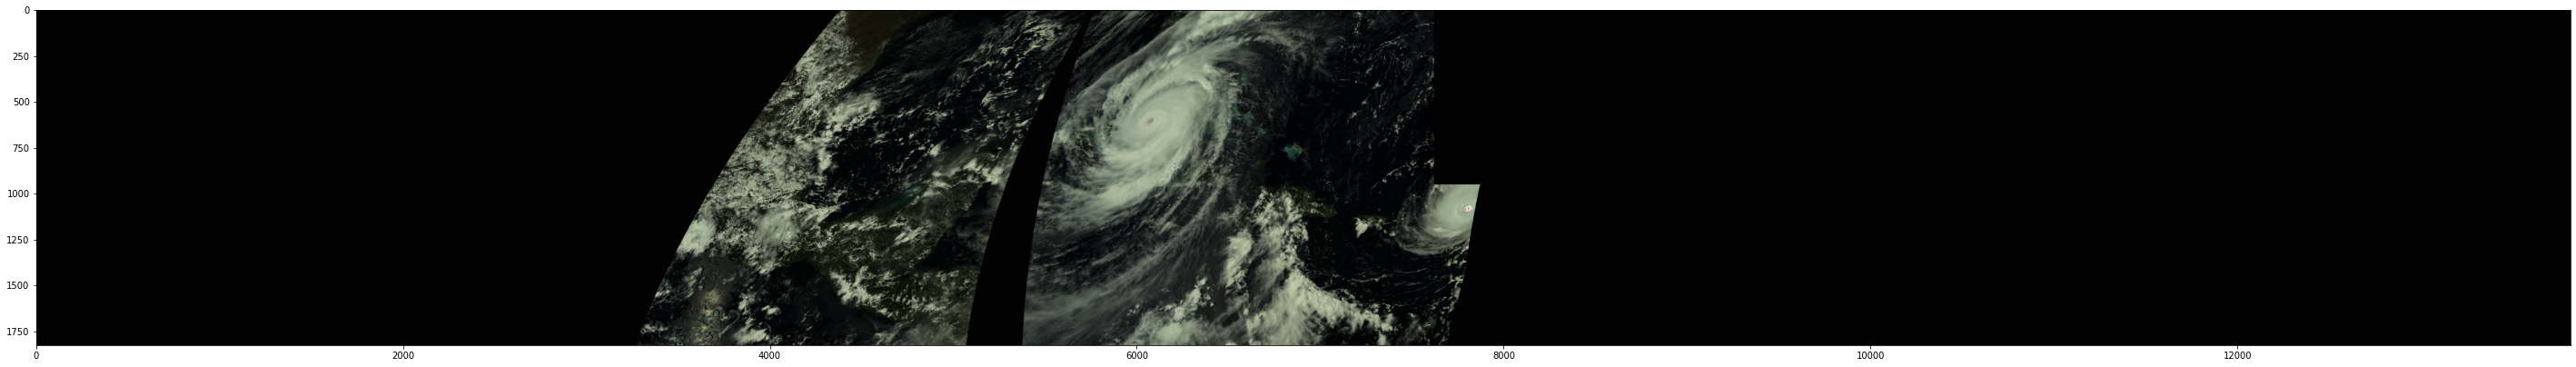

In [ ]:
im = plt.imread('/content/gdrive/Shared drives/2020_FDLUSA_Earth Science_Knowledge Discovery Framework/Code/Datasets/modis/modis_2017_sep.png')
plt.figure(figsize=(50,50))
plt.imshow(im)
